In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, 

# Trees and Ensemble Methods

In [3]:
adult_income_data = pd.read_csv("adult.csv")

In [4]:
adult_income_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
adult_income_data = adult_income_data.drop("fnlwgt", axis = 1)

In [6]:
adult_income_data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
attributes = adult_income_data.drop("income", axis = 1)

In [8]:
labels = adult_income_data.income

In [9]:
adult_income_data.groupby("income").size() / len(adult_income_data)

income
<=50K    0.760718
>50K     0.239282
dtype: float64

In [10]:
attributes = pd.get_dummies(attributes)

In [11]:
scaler = MinMaxScaler()

In [12]:
attributes = scaler.fit_transform(attributes)

In [13]:
attributes.shape

(48842, 107)

In [14]:
attributes_train, attributes_test, labels_train, labels_test = train_test_split(
    attributes, labels, train_size = 0.8, stratify = labels)

In [15]:
pd.Series(labels_test).groupby(labels_test).size() / len(labels_test)

income
<=50K    0.760672
>50K     0.239328
Name: income, dtype: float64

In [16]:
tree = DecisionTreeClassifier()

In [17]:
tree.fit(attributes_train, labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
tree.score(attributes_train, labels_train)

0.9743812863102398

In [19]:
tree.score(attributes_test, labels_test)

0.8243423072985976

In [20]:
tree.get_depth()

51

In [21]:
params = {
    "max_depth": [2, 4, 10, 15, 20, 25, 28, 30],
    "min_samples_leaf": [5, 10, 15, 20, 30, 50]
}

grid = GridSearchCV(DecisionTreeClassifier(), params, scoring = make_scorer(f1_score, pos_label = ">50K"))

In [22]:
grid.fit(attributes_train, labels_train)

/home/karatov/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 4, 10, 15, 20, 25, 28, 30],
                         'min_samples_leaf': [5, 10, 15, 20, 

In [23]:
grid.best_params_

{'max_depth': 25, 'min_samples_leaf': 50}

In [24]:
grid.cv_results_

{'mean_fit_time': array([0.09519172, 0.09654744, 0.09615684, 0.09763805, 0.09682353,
        0.0956436 , 0.13645689, 0.13896092, 0.13627219, 0.13575244,
        0.13598307, 0.151016  , 0.23920131, 0.21717874, 0.2289563 ,
        0.25389886, 0.24780242, 0.22652253, 0.25523678, 0.25009386,
        0.24576386, 0.24367984, 0.2336181 , 0.22798562, 0.27369499,
        0.26391904, 0.25858784, 0.25424997, 0.24107941, 0.23249817,
        0.27777743, 0.26719697, 0.25879653, 0.25660698, 0.24111501,
        0.23247989, 0.29900742, 0.27819824, 0.30703894, 0.25609469,
        0.25257119, 0.25729545, 0.28350536, 0.26781305, 0.26338887,
        0.27043931, 0.29645133, 0.28869335]),
 'std_fit_time': array([0.00122303, 0.00048905, 0.00047915, 0.00066122, 0.00190799,
        0.0004698 , 0.00107329, 0.00270202, 0.00080609, 0.00061533,
        0.00042661, 0.0132771 , 0.01410915, 0.0042363 , 0.0143541 ,
        0.03507113, 0.00324351, 0.02745902, 0.00338677, 0.00338581,
        0.00480685, 0.00404518, 0.009

In [25]:
grid.best_estimator_.score(attributes_train, labels_train)

0.8664295037493922

In [26]:
grid.best_estimator_.score(attributes_test, labels_test)

0.8608864776333299

In [27]:
predicted_labels_train = grid.best_estimator_.predict(attributes_train)
print(classification_report(labels_train, predicted_labels_train))

              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92     29724
        >50K       0.78      0.61      0.69      9349

    accuracy                           0.87     39073
   macro avg       0.83      0.78      0.80     39073
weighted avg       0.86      0.87      0.86     39073



In [28]:
predicted_labels_test = grid.best_estimator_.predict(attributes_test)
print(classification_report(labels_test, predicted_labels_test))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7431
        >50K       0.76      0.60      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [29]:
grid.best_estimator_.feature_importances_

array([5.67284991e-02, 2.05239968e-01, 1.87211845e-01, 5.07213128e-02,
       4.24428960e-02, 0.00000000e+00, 1.14889186e-03, 4.08492643e-04,
       0.00000000e+00, 3.17896804e-03, 6.97705990e-04, 7.89885417e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.22424675e-04,
       1.63017827e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.96800230e-03, 0.00000000e+00, 5.34794516e-04,
       0.00000000e+00, 1.55535852e-03, 1.34615726e-04, 0.00000000e+00,
       1.68316686e-03, 2.22314448e-04, 1.06899869e-04, 0.00000000e+00,
       3.96159121e-01, 0.00000000e+00, 2.37066589e-04, 0.00000000e+00,
       3.69889891e-06, 0.00000000e+00, 2.05559772e-04, 0.00000000e+00,
       1.99456801e-03, 1.27938363e-02, 1.47559478e-03, 0.00000000e+00,
       1.98412646e-04, 6.57604630e-03, 0.00000000e+00, 6.44858095e-03,
       1.70137607e-05, 3.49639529e-03, 8.55897484e-04, 1.46210177e-04,
       6.43853834e-06, 6.49436445e-04, 0.00000000e+00, 3.82341486e-05,
      

<BarContainer object of 107 artists>

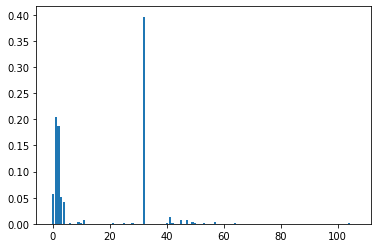

In [30]:
plt.bar(range(len(grid.best_estimator_.feature_importances_)), grid.best_estimator_.feature_importances_)

In [31]:
params_forest = {
    "n_estimators": [10, 100, 200, 250, 300],
    "max_depth": [2, 4, 10, 15, 20, 25, 28, 30]
}

grid_forest = GridSearchCV(RandomForestClassifier(), params_forest, scoring=make_scorer(f1_score, pos_label = ">50K"))

In [32]:
grid_forest.fit(attributes_train, labels_train)

/home/karatov/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/karatov/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [33]:
grid_forest.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [34]:
tree = DecisionTreeClassifier(max_depth=1)

In [35]:
tree.fit(attributes_train, labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
f1_score(labels_test, tree.predict(attributes_test), pos_label=">50K")

/home/karatov/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [37]:
f1_score(labels_train, tree.predict(attributes_train), pos_label=">50K")

/home/karatov/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [38]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 1), n_estimators=100, learning_rate=0.1)

In [39]:
ada.fit(attributes_train, labels_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [40]:
f1_score(labels_test, ada.predict(attributes_test), pos_label=">50K")

0.6365979381443299

In [41]:
f1_score(labels_train, ada.predict(attributes_train), pos_label=">50K")

0.6353576942871847

In [64]:
attributes_train, attributes_test, labels_train, labels_test = train_test_split(
    attributes, labels, train_size = 0.8, stratify = labels)

In [65]:
forest = RandomForestClassifier(max_depth=5, n_estimators=50)

In [66]:
forest.fit(attributes_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
forest.score(attributes_train, labels_train)

0.8397102858751567

In [68]:
forest.score(attributes_test, labels_test)

0.8349882280683796